# Корреляционные тесты

Переменные в наборе данных могут быть связаны по многим причинам.

Например:

- Переменная может быть причиной или зависеть от значений другой переменной.
- Переменная может быть связана с другой переменной.
- Две переменные могут зависеть от третьей неизвестной переменной.

Подобные знания нужны при анализе данных и моделировании, чтобы лучше понять отношения между переменными. Статистическая связь между двумя переменными называется их **корреляцией**.

Корреляция может быть **положительной**, когда обе переменные движутся в одном направлении, или **отрицательной**, когда значение одной переменной увеличивается, значения других переменных уменьшаются. Корреляция также может быть **нейтральной** или **нулевой**, что означает, что переменные не связаны между собой:

- **Положительная корреляция**: обе переменные изменяются в одном направлении.
- **Нейтральная корреляция**: нет связи в изменении переменных.
- **Отрицательная корреляция**: переменные изменяются в противоположных направлениях.

Производительность некоторых алгоритмов может ухудшиться, если две или более переменных тесно связаны, что называется **мультиколлинеарностью**. Примером может служить **линейная регрессия**, где одна из коррелированных переменных, вызывающих нарушение, должна быть удалена, чтобы улучшить модель.

Нас также может интересовать **корреляция между входными переменными и выходной переменной**, чтобы понять, какие переменные могут или не могут быть релевантными в качестве входных данных для разработки модели.

Структура связи может быть известна, например, она может быть линейной, или мы можем не знать, существует ли связь между двумя переменными или вообще какую структуру она имеет. В зависимости от того, что известно об отношениях и распределении переменных, могут быть рассчитаны различные **оценки корреляции**.

В этом уроке мы рассмотрим оценку для переменных, которые имеют гауссово распределение и линейную зависимость, и другую, которая не предполагает распределения и будет сообщать о любых монотонных (возрастающих или убывающих) отношениях.

## Тестовый набор данных

Прежде чем мы рассмотрим **методы корреляции**, давайте определим набор данных, который будем использовать для тестирования методов.

Создадим 1000 выборок двух переменных **с сильной положительной корреляцией**. Первая переменная будет случайным числом, взятым из гауссовского распределения со средним значением 100 и стандартным отклонением 20. Вторая переменная будет значением из первой переменной с гауссовым шумом, добавленным со средним значением 50 и стандартным отклонением 10. 

Мы будем использовать функцию randn() для генерации случайных гауссовых значений со средним значением 0 и стандартным отклонением 1, затем умножим результаты на наше собственное стандартное отклонение и добавим среднее значение, чтобы сместить значения в предпочтительный диапазон.


вектор данных 1: среднее=100.776 стандартное отклонение=19.620
вектор данных 2: среднее=151.050 стандартное отклонение=22.358


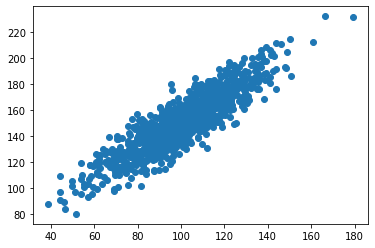

In [ ]:
# Генерация связанных переменных
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# запуск генератора случайных чисел
seed(1)
# подготовка данных
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# вычисление оценок
print('вектор данных 1: среднее=%.3f стандартное отклонение=%.3f' % (mean(data1), std(data1)))
print('вектор данных 2: среднее=%.3f стандартное отклонение=%.3f' % (mean(data2), std(data2)))
# график
pyplot.scatter(data1, data2)
pyplot.show()

Создается точечная диаграмма двух переменных. Поскольку мы сами придумали набор данных, то знаем, что между двумя переменными существует связь. Это становится ясно, когда мы рассматриваем сгенерированный график рассеяния, на котором мы видим тенденцию к увеличению.

Прежде чем мы рассмотрим расчет некоторых показателей корреляции, мы должны сначала рассмотреть важный статистический показатель, называемый **ковариацией**.

Переменные могут быть связаны **линейной зависимостью**. Это взаимосвязь, которая постоянно аддитивна для двух выборок данных. Это отношение между двумя переменными можно обобщить и оно называется **ковариацией**. 

Ковариация рассчитывается как среднее произведение между значениями из каждой выборки, где значения были центрированы (из них вычитались средние значения).

Расчет выборочной ковариации выглядит следующим образом:
```
cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)
```

Использование среднего значения в расчетах предполагает необходимость того, чтобы каждая выборка данных имела гауссово или подобное гауссову распределение.

Знак ковариации можно интерпретировать как изменение двух переменных в одном и том же направлении (**положительное**) или изменение в разных направлениях (**отрицательное**). Величину ковариации нелегко интерпретировать. **Нулевое значение ковариации указывает на то, что обе переменные полностью независимы**.

Функцию **cov()** из пакета **NumPy** можно использовать для вычисления **ковариационной матрицы** между двумя или более переменными.

```
covariance = cov(data1, data2)
```

Диагональ матрицы содержит ковариацию между каждой переменной и самой собой. Другие значения в матрице представляют собой ковариацию между двумя переменными; в этом случае оставшиеся два значения совпадают, учитывая, что мы вычисляем ковариацию только для двух переменных.

Мы можем вычислить ковариационную матрицу для двух переменных для наших исходных данных.

In [ ]:
# Вычисление ковариации между двумя переменными
from numpy.random import randn
from numpy.random import seed
from numpy import cov
# запуск генератора случайных чисел
seed(1)
# подготовка данных
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# вычисление матрицы ковариации
covariance = cov(data1, data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


Ковариация и ковариационная матрица широко используются в статистике и многомерном анализе для характеристики отношений между двумя или более переменными.

При выполнении примера вычисляется и печатается ковариационная матрица. 

Поскольку набор данных был создан с каждой переменной, взятой из распределения Гаусса, и переменные линейно коррелированы, ковариация является разумным методом для описания взаимосвязи.

Ковариация между двумя переменными составляет 389,75. Мы видим, что оно положительное, предполагая, что переменные изменяются в том же направлении, каком мы ожидаем.

Проблема ковариации как статистического инструмента заключается в том, что ее сложно интерпретировать. Это подталкивает нас к **коэффициенту корреляции Пирсона**.

## Корреляция Пирсона

**Коэффициент корреляции Пирсона** (названный в честь Карла Пирсона) можно использовать для суммирования силы линейной зависимости между двумя выборками данных.

Коэффициент корреляции Пирсона рассчитывается как ковариация двух переменных, деленная на произведение стандартного отклонения каждой выборки данных. Это **нормализация ковариации** между двумя переменными для получения интерпретируемой оценки.
```
Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
```
Использование среднего значения и стандартного отклонения в расчетах предполагает необходимость того, чтобы две выборки данных имели гауссово или подобное гауссову распределение.

Результат расчета коэффициента корреляции можно интерпретировать, чтобы понять взаимосвязь.

Коэффициент возвращает значение от -1 до 1, которое представляет пределы корреляции от полной отрицательной до полной положительной корреляции. Значение 0 означает отсутствие корреляции. 

Значение необходимо интерпретировать, поскольку часто значение ниже -0,5 или выше 0,5 указывает на заметную корреляцию, а значения ниже этих значений предполагают менее заметную корреляцию.

Функцию **pearsonr()** пакета **SciPy** можно использовать для вычисления **коэффициента корреляции Пирсона** между двумя выборками данных одинаковой длины.

Мы можем рассчитать корреляцию между двумя переменными на основе наших данных.

In [ ]:
# Вычисление корреляции Пирсона для двух переменных
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# запуск генератора случайных чисел
seed(1)
# подготовка данных
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# вычисление коэффициента корреляции Пирсона
corr, _ = pearsonr(data1, data2)
print('Корреляция Пирсона: %.3f' % corr)

Корреляция Пирсона: 0.888


При выполнении примера вычисляется и печатается коэффициент корреляции Пирсона.

Мы видим, что две переменные положительно коррелированы и что корреляция составляет 0,8. Это предполагает высокий уровень корреляции, например, значение выше 0,5 и близко к 1,0.

Коэффициент корреляции Пирсона можно использовать для оценки связи между более чем двумя переменными.Это можно сделать, вычислив матрицу взаимосвязей между каждой парой переменных в наборе данных. В результате получается симметричная матрица, называемая корреляционной матрицей, со значением 1,0 по диагонали, поскольку каждый столбец всегда идеально коррелирует сам с собой.

## Корреляция Спирмена

Две переменные могут быть связаны **нелинейной зависимостью**, она будет зависеть от распределения переменных. Кроме того, две рассматриваемые переменные могут иметь негауссово распределение.

В этом случае **коэффициент корреляции Спирмена** (названный в честь Чарльза Спирмена) можно использовать для суммирования силы двух выборок данных. Этот тест взаимосвязи также можно использовать, если существует линейная зависимость между переменными, но он будет иметь несколько меньшую мощность (например, может привести к более низким коэффициентам).

Как и в случае с коэффициентом корреляции Пирсона, значения находятся в диапазоне от -1 до 1 для полностью отрицательно коррелированных переменных и совершенно положительно коррелированных, соответственно.

Вместо расчета коэффициента с использованием ковариации и стандартных отклонений для самих выборок эти статистические данные рассчитываются на основе относительного ранга значений в каждой выборке. Это распространенный подход, используемый в непараметрической статистике, например, в статистических методах, где мы не предполагаем распределение данных, такое как гауссово.

```
Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))
```

Линейная зависимость между переменными не предполагается, хотя предполагается **монотонная зависимость**. Это математическое название возрастающей или убывающей зависимости между двумя переменными.

Если вы не уверены в распределении и возможных отношениях между двумя переменными, коэффициент корреляции Спирмена является хорошим инструментом для использования.

Функцию **spearmanr()** пакета **SciPy** можно использовать для вычисления **коэффициента корреляции Спирмена** между двумя выборками данных одинаковой длины.

Мы можем рассчитать корреляцию между двумя переменными на наших текстовых данных.


In [ ]:
# Вычисление корреляции Спирмена между двумя переменными
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
# запуск генератора случайных чисел
seed(1)
# подготовка данных
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# вычисление корреляции Спирмена
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.872


При выполнении примера вычисляется и печатается коэффициент корреляции Спирмена.

Мы знаем, что данные являются гауссовскими и что связь между переменными линейна. Тем не менее, непараметрический ранговый подход показывает сильную корреляцию между переменными 0,8.

Как и в случае с коэффициентом корреляции Пирсона, этот коэффициент можно вычислить попарно для каждой переменной в наборе данных, чтобы получить матрицу корреляции для обзора.

## Ранговая корреляция

Корреляция между двумя переменными, каждая из которых имеет распределение Гаусса, может быть рассчитана с использованием стандартных методов, таких как корреляция Пирсона. Эту процедуру нельзя использовать для данных, которые не имеют распределения Гаусса. Вместо этого необходимо использовать методы **ранговой корреляции**.

**Ранговая корреляция** относится к методам, которые количественно определяют связь между переменными, используя порядковые отношения между значениями, а не конкретные значения. **Порядковые данные** — это данные, которые имеют значения меток и отношения порядка или ранга; например: «низкий», «средний» и «высокий».

Ранговая корреляция может быть рассчитана для вещественных переменных. Это делается путем преобразования значений каждой переменной в **ранговые данные**. Здесь значения упорядочиваются и им присваивается целочисленное ранговое значение. Затем можно рассчитать коэффициенты ранговой корреляции, чтобы количественно оценить связь между двумя ранжированными переменными.

Поскольку распределение значений не предполагается, методы ранговой корреляции называются корреляцией без распределения или непараметрической корреляцией. Интересно, что меры ранговой корреляции часто используются в качестве основы для других статистических проверок гипотез , таких как определение вероятности того, что две выборки были взяты из одного и того же (или разных) распределения населения.

Методы ранговой корреляции часто называют в честь исследователя или исследователей, разработавших метод. Вот четыре примера методов ранговой корреляции:
- **Ранговая корреляция Спирмена.**
- **Ранговая корреляция Кендалла.**
- **Ранговая корреляция Гудмана и Крускала.**
- **Ранговая корреляция Сомерса.**

Рассмотрим один из наиболее распространенных методов ранговой корреляции - **метод Кендалла**.

### Тестовый набор данных

Сначала определим простой набор данных с двумя переменными, где каждая переменная берется из равномерного распределения (негауссовского), а значения второй переменной зависят от значений первого значения.

В частности, выборка из 1000 случайных значений с плавающей запятой берется из равномерного распределения и масштабируется до диапазона от 0 до 20. 

Вторая выборка из 1000 случайных значений с плавающей запятой берется из равномерного распределения от 0 до 10 и добавляется к значениям в первый образец для создания ассоциации.

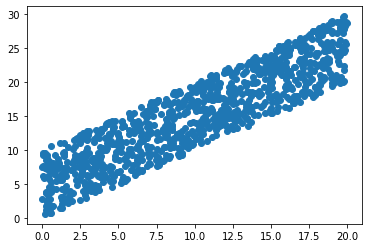

In [6]:
# Генерирация связанных переменных
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
# запуск генератора случайных чисел
seed(1)
# подготовка данных
data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)
# построение графика
pyplot.scatter(data1, data2)
pyplot.show()

При выполнении примера создается выборка данных и отображаются точки на диаграмме.

Мы можем ясно видеть, что каждая переменная имеет равномерное распределение, и положительная связь между переменными видна по диагональному группированию точек от левого нижнего до правого верхнего угла графика.

### Ранговая корреляция Кендалла

**Ранговая корреляция Кендалла** названа в честь Мориса Кендалла. Ее также называют **коэффициентом корреляции Кендалла**, и этот коэффициент часто обозначается строчной греческой буквой **тау (т)** (можно назвать **тау Кендалла**).

Интуиция теста заключается в том, что он вычисляет нормализованную оценку для количества совпадающих или согласующихся рангов между двумя выборками. Таким образом, тест также называют **тестом на соответствие Кендалла**.

Коэффициент ранговой корреляции Кендалла можно рассчитать в Python с помощью функции **kendalltau()** пакета **SciPy**. Тест принимает две выборки данных в качестве аргументов и возвращает **коэффициент корреляции** и **p-значение**. В качестве проверки статистической гипотезы метод предполагает гипотезу H0 - между двумя выборками нет связи (выборки не коррелированы).

Мы можем продемонстрировать расчет на тестовом наборе данных, где мы ожидаем, что будет сообщено о значительной положительной связи.

In [8]:
# Рассчет корреляции Кендалла между двумя переменными
from numpy.random import rand
from numpy.random import seed
from scipy.stats import kendalltau
# запуск генератора случайных чисел
seed(1)
# подготовка данных
data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)
# рассчет корреляции Кендалла
coef, p = kendalltau(data1, data2)
print('Коэффициент корреляции Кендалла: %.3f' % coef)
# интерпретация значения
alpha = 0.05
if p > alpha:
	print('Выборки не коррелированы (не удается отклонить H0) p=%.3f' % p)
else:
	print('Образцы коррелированы (отклонение H0) p=%.3f' % p)

Коэффициент корреляции Кендалла: 0.709
Образцы коррелированы (отклонение H0) p=0.000


При выполнении примера коэффициент корреляции Кендалла вычисляется как 0,7, что интерпретируется как высокая степень корреляции.

Значение p близко к нулю (и печатается как ноль), это значит, что мы можем уверенно отвергнуть нулевую гипотезу о некоррелированности выборок.